In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()

In [ ]:
diabetes;

In [ ]:
x, y = diabetes.data, diabetes.target

In [ ]:
# cross validation

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Feature Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Perceptron

In [ ]:
perceptron = Perceptron(max_iter=1000, random_state=42)

In [ ]:
perceptron.fit(x_train_scaled, y_train)

Perceptron(random_state=42)

# predict on test data

In [ ]:
y_pred = perceptron.predict(x_test_scaled)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)

In [ ]:
print('mean squared error:', MSE)

mean squared error: 6050.932584269663


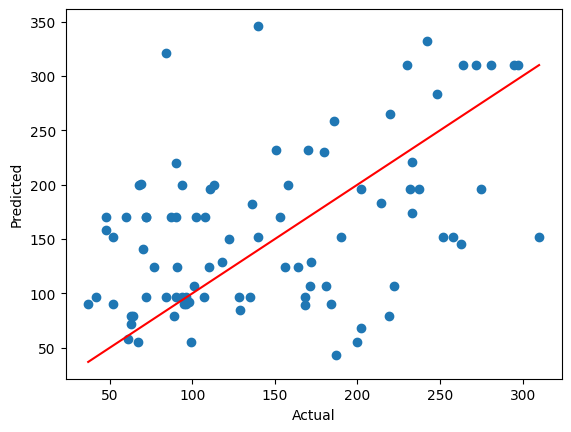

In [ ]:
plt.scatter(y_test, y_pred)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r')

plt.xlabel('Actual')
plt.ylabel('Predicted');

# Multi-Layer(sklearn)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 50),
                   activation= 'relu',
                   max_iter=1000, random_state=42,
                   solver = 'adam')

In [ ]:
mlp.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [ ]:
# predict on test set
y_pred_mlp = mlp.predict(x_test_scaled)

In [ ]:
MSE_mlp = mean_squared_error(y_test, y_pred_mlp)

In [ ]:
MSE_mlp

2830.007843968821

# single layer Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
x_train.shape

(353, 10)

In [ ]:
x_train.shape[1:]

(10,)

In [ ]:
model_slp = Sequential()

# add the layer
model_slp.add(Dense(1, input_shape=x_train.shape[1:]))

In [ ]:
model_slp.compile(optimizer='adam',
              loss='mean_squared_error')

In [ ]:
history_slp = model_slp.fit(x_train, y_train, epochs=1000, batch_size= 32,
              validation_data=(x_test_scaled, y_test), verbose = 1)

Epoch 1/1000
12/12 [==============================] - 0s 23ms/step - loss: 26076.0508 - val_loss: 22832.0176
Epoch 2/1000
12/12 [==============================] - 0s 8ms/step - loss: 26072.5918 - val_loss: 22829.0273
Epoch 3/1000
12/12 [==============================] - 0s 7ms/step - loss: 26069.0703 - val_loss: 22825.7695
Epoch 4/1000
12/12 [==============================] - 0s 7ms/step - loss: 26065.4961 - val_loss: 22822.7930
Epoch 5/1000
12/12 [==============================] - 0s 13ms/step - loss: 26061.9824 - val_loss: 22820.1035
Epoch 6/1000
12/12 [==============================] - 0s 16ms/step - loss: 26058.6836 - val_loss: 22817.4922
Epoch 7/1000
12/12 [==============================] - 0s 15ms/step - loss: 26055.2090 - val_loss: 22815.0059
Epoch 8/1000
12/12 [==============================] - 0s 7ms/step - loss: 26051.5918 - val_loss: 22812.4668
Epoch 9/1000
12/12 [==============================] - 0s 9ms/step - loss: 26048.0957 - val_loss: 22809.9238
Epoch 10/1000
12/12 [===

In [ ]:
loss_slp = model_slp.evaluate(x_test_scaled, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 21288.5000


In [ ]:
print('mean squared error:', loss_slp)

mean squared error: 21288.5


# Multi-layer keras

In [ ]:
model_mlp = Sequential()

# add the layer

model_mlp.add(Dense(50, activation='relu', input_shape=x_train.shape[1:]))
model_mlp.add(Dense(50, activation='relu'))
model_mlp.add(Dense(1))

In [ ]:
# compile the model
model_mlp.compile(optimizer='adam',
              loss='mean_squared_error')

In [ ]:
history_mlp = model_mlp.fit(x_train_scaled, y_train, epochs=1000, batch_size= 32,
              validation_data=(x_test_scaled, y_test), verbose = 1)

Epoch 1/1000
12/12 [==============================] - 3s 38ms/step - loss: 29630.7402 - val_loss: 26344.6855
Epoch 2/1000
12/12 [==============================] - 0s 12ms/step - loss: 29390.0332 - val_loss: 26109.0312
Epoch 3/1000
12/12 [==============================] - 0s 9ms/step - loss: 29122.5391 - val_loss: 25808.8457
Epoch 4/1000
12/12 [==============================] - 0s 10ms/step - loss: 28753.6523 - val_loss: 25392.3008
Epoch 5/1000
12/12 [==============================] - 0s 10ms/step - loss: 28254.5078 - val_loss: 24830.2891
Epoch 6/1000
12/12 [==============================] - 0s 9ms/step - loss: 27583.5527 - val_loss: 24085.0000
Epoch 7/1000
12/12 [==============================] - 0s 9ms/step - loss: 26696.6348 - val_loss: 23103.0801
Epoch 8/1000
12/12 [==============================] - 0s 12ms/step - loss: 25539.1680 - val_loss: 21886.7422
Epoch 9/1000
12/12 [==============================] - 0s 16ms/step - loss: 24105.9414 - val_loss: 20492.3457
Epoch 10/1000
12/12 [=

In [ ]:
loss_mlp = model_mlp.evaluate(x_test_scaled, y_test)
print('mean squared error:', loss_mlp)

3/3 [==============================] - 0s 6ms/step - loss: 3320.4390
mean squared error: 3320.43896484375


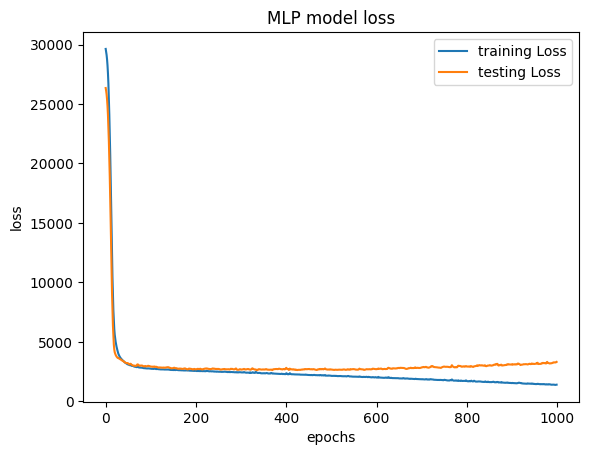

In [ ]:
# plot training history

plt.plot(history_mlp.history['loss'], label='training Loss')
plt.plot(history_mlp.history['val_loss'], label='testing Loss')
plt.title('MLP model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();